# Case 1: Analyzing the conservation of resting-fMRI gradients

This example shows how to translate mouse functional gradient to the human brain and compared with human functional gradient.

## Introduction  

- Functional gradients are the inherent patterns of brain activity or connectivity that smoothly transition across different brain regions, reflecting the gradual shift in neural function and cognitive processes within the brain's organization.

- Functional gradients has been extensively characterized in both humans and mice, providing valuable insights for investigating cognitive processes and psychiatric disorders ([ref1](https://www.pnas.org/doi/abs/10.1073/pnas.1608282113), [ref2](https://www.sciencedirect.com/science/article/abs/pii/S1053811915011301)).  

- Here, we use ​**TransBrain**​ to compare the cross-species correspondence of the Gradient 2 of the cortex as an example.

Import necessary dependencies.

In [32]:
import pandas as pd
import numpy  as np
from nilearn import image,plotting
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import transbrain as tb

First, we need to fetch the mouse brain atlas, which will be used in later steps to extract phenotypes. Set region_type to 'cortex' as we are extracting the regional value of cortical gradient.

In [33]:
mouse_atlas = tb.atlas.fetch_mouse_atlas(region_type='cortex')

We will load the pre-saved gradient files from the tutorial directory to extract the regional phenotypes. The gradient was calculated based on the awake mouse resting-state fMRI data from [this dataset](https://data.mendeley.com/datasets/np2fx99hn6/2/).  

In [34]:
from transbrain.vis import map_phenotype_to_nifti, plot_mouse_phenotype

gradient_img = image.load_img('gradient_2_in_CCFv3.nii.gz')

#Get regional phenotypes.
mouse_gradient = tb.base.get_region_phenotypes(gradient_img,mouse_atlas,atlas_type='mouse',region_type='cortex')

Resampling to match atlas...


Now we got the mouse regional gradient DataFrame, we can take a look at it.

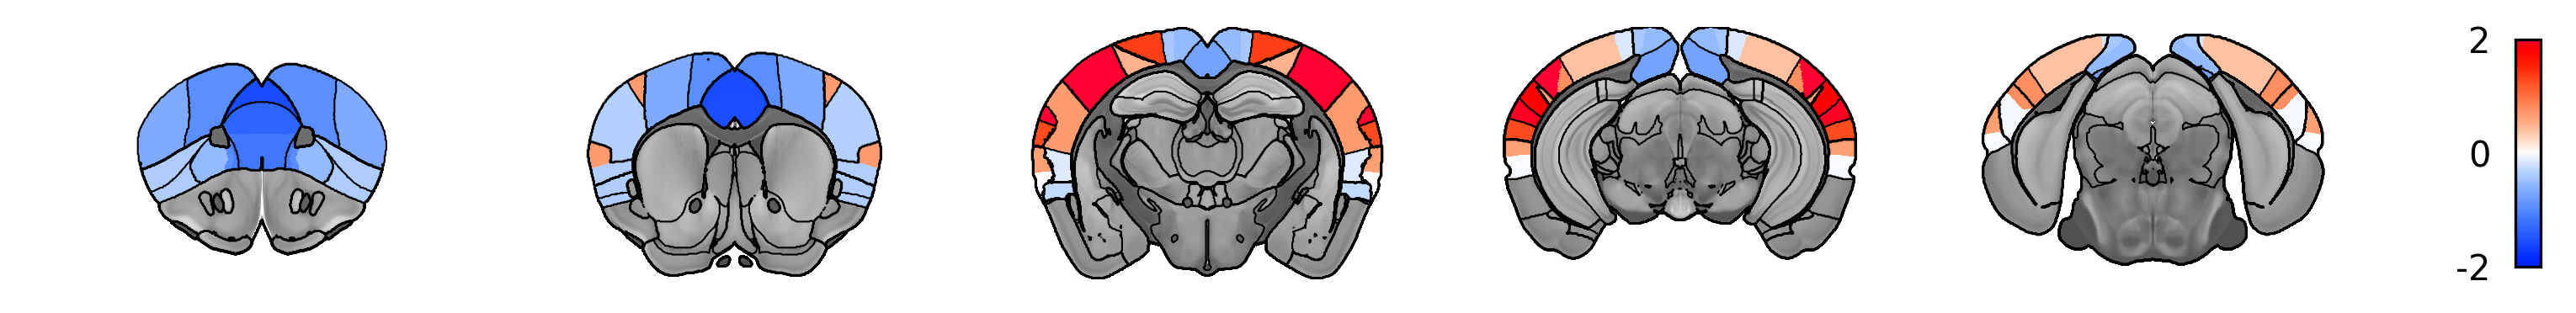

In [35]:
# map the region-level phenotype data to an image
mouse_phenotype_img = map_phenotype_to_nifti(mouse_gradient, mouse_atlas)

# use TransBrain's visualization function to view the mouse Gradient
plot_mouse_phenotype(mouse_phenotype_img, coor=[1.85, 0.85, -1.65, -3.15, -3.95], normalize_img = True, symmetric_cbar=True,vmax=2, threshold=0)

## Mapping mouse gradient to human

Before starting the mapping, we need to initialize TransBrain by creating an instance of the ``SpeciesTrans`` class. Here, we choose the BN (Brainnetome) atlas as the target space for mapping.

In [36]:
Transformer = tb.trans.SpeciesTrans('bn')

INFO:root:Initialized for bn atlas.


Use ``mouse_to_human`` function to conduct mapping.

In [37]:
gradient_trans_in_human = Transformer.mouse_to_human(mouse_gradient,region_type='cortex')

INFO:root:Successfully translated mouse cortex phenotypes to human.


Then we got the mouse gradient mapped to human.

In [38]:
gradient_trans_in_human

,Phenotype
A8m,0.128396
A8dl,0.225116
A9l,0.042668
A6dl,0.327516
A6m,0.166944
...,...
A28/34,0.400979
TH,0.420043
TI,0.618959
rpSTS,0.849637


## Compare with human Gradient
Next, we load the real Gradient 2 computed on human resting-state fMRI (based on [HCP Young Adult Data Release](https://www.humanconnectome.org/study/hcp-young-adult/data-releases)) and analyze the cross-species conservation of it.

In [39]:
#fetch human atlas
human_atlas = tb.atlas.fetch_human_atlas(atlas_type='bn', region_type='cortex')

human_gradient  = tb.base.get_region_phenotypes('./gradient_2_in_MNI.nii.gz',human_atlas,atlas_type='bn',region_type='cortex')

View human gradient on surface

<Figure size 640x480 with 0 Axes>

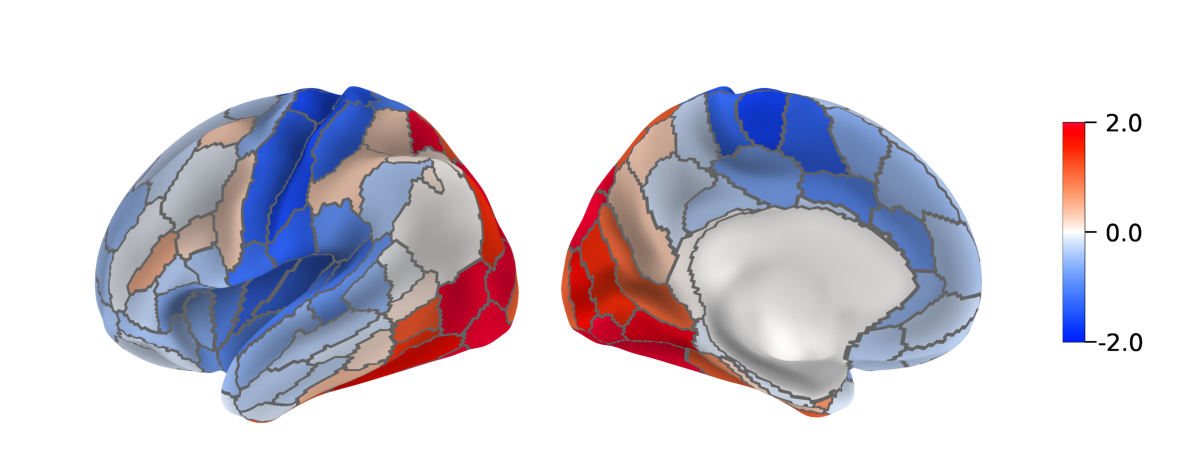

In [40]:
from transbrain.surf import BN_region_to_vertex, plot_surface_phenotype
from IPython.display import display


# Generate vertex data
vertex_data = BN_region_to_vertex(human_gradient)
# View
visualize = plot_surface_phenotype(vertex_data, vmax=2, thresh=0, darkness=0.6, show_boundary=True, sym_bar=True)

fig, ax = plt.subplots(figsize=(15, 12))
ax.imshow(visualize)
ax.axis('off')
plt.show()

## Cross-species correlation
With the help of TransBrain, now we can calculate correlation coefficient and check the conservation of resting-fMRI gradients across species. We can find that the pattern of this gradient is significantly correlated across species.

In [45]:
human_gradient_matrix = np.squeeze(np.asarray(human_gradient))
mouse_gradient_in_human_matrix = np.squeeze(np.asarray(gradient_trans_in_human))

correlation, p_value = stats.pearsonr(human_gradient_matrix, mouse_gradient_in_human_matrix)

print("Correlation: {:.4f}".format(correlation))
print("p-value:", p_value)

Correlation: 0.4710
p-value: 3.958575260995172e-07
